Видео лабораторной: https://youtu.be/JogmM2je_Sw

TG: https://t.me/data_science_news



---


In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [12, 8]

## Задача 1 (простой односторонный асимтотический тест)

На автомобильном заводе разрабатывают новую функцию двигателей для более экономного расхода топлива. Допустим, из передыдущих исследований известно, что на 1 литр топлива можно проехать 11 километров в стиле городской езды со стандартным отклонением 4.3. После внедрения нового механизма расхода топлива на 1 литр, в среднем, автомобили стали проезжать 11.3 километров. Нужно ли внедрять новые двигатели в производство или такой результат просто случайно получился? Предположим, что условия для применения центральной предельной теоремы удовлетворяются. Количество измерений равно 30.


### Формализация задачи

Средний расход топлива, при соблюдении технических условий, согласно CLT подчиняется нормальному распределению:

$$\frac{1}{n} \Sigma_{i=1}^N=\bar{X}_{N}  \sim N(\mu,\frac{\sigma^2}{N})$$

С нормализацией:

$$\left( \sqrt{N}\frac{\bar{X}_{N}-\mu}{\sigma} \right) \sim N(0,1)$$

По условию известно, то текущий расход $\mu_0=11$, расход с новой функцией это $\mu_A=11.3$.

Для рещения задачи необходимо выполнить **тест**

$$H_0: \mu_A = \mu_0\ \mathrm{VS}\ H_A: \mu_A > \mu_0$$

где $H_0$ это нулевая гипотеза  (средний расход топлива до внедрения улучшений в двигатель), $H_A$ альтернативная гипотеза.



In [ ]:
mu_0 = 11
mu_a = 11.3
sigma = 4.3
N=30

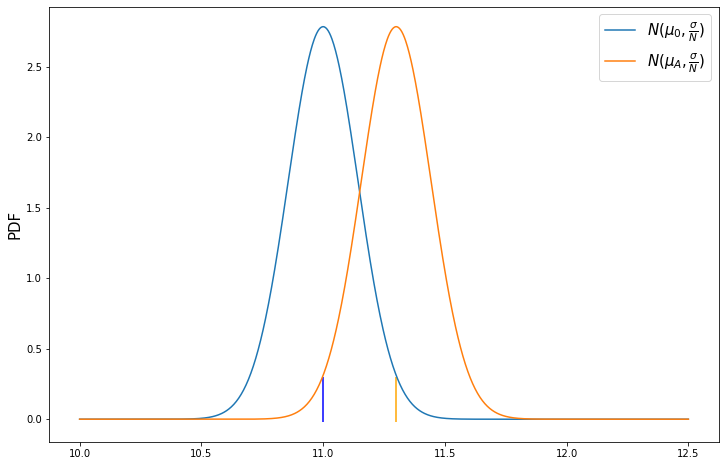

In [ ]:
x = np.linspace(10,12.5,1000)
plt.plot(x,norm.pdf(x, mu_0, sigma/N), label=r"$N(\mu_0,\frac{\sigma}{N}$)")
plt.plot(x,norm.pdf(x, mu_a, sigma/N), label=r"$N(\mu_A,\frac{\sigma}{N}$)")
plt.vlines(mu_0,-0.02,+0.3, 'blue')
plt.vlines(mu_a,-0.02,+0.3, 'orange')
plt.ylabel('PDF', fontsize = 15)
plt.legend(fontsize=15)

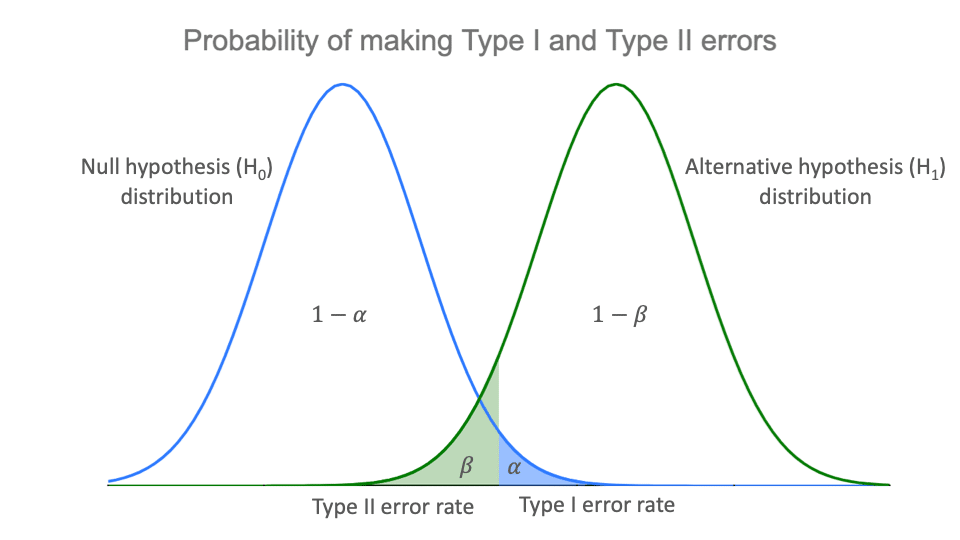

Source: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

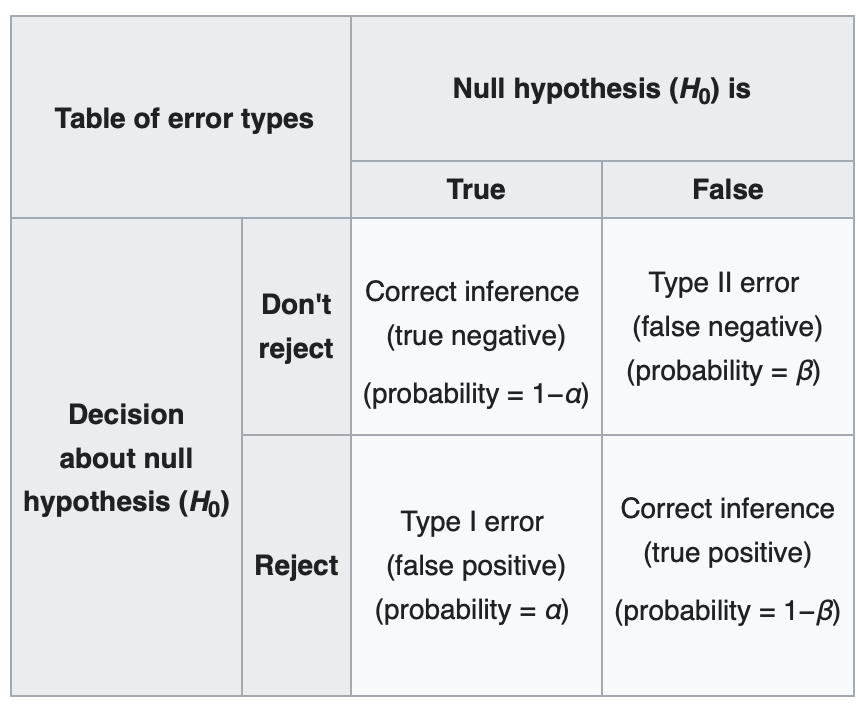

source: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

### Статистический критерий (test statistics)

Зафиксируем уровень статистической значимости в 95%. Следовательно, ошибка первого рода равна $\alpha=0.05$. То есть вероятность того, что мы отклоним нулевую гипотезу, при том что она истинна равна 5%.

Или формально: $P(\mathrm{reject\ H_o}|\mathrm{H_o\ true})=0.05$

Из этого следует:

$$P \left(\sqrt{N} \frac{\bar{X}_{N_0} - \mu_0}{\sigma} \geq \sqrt{N} \frac{\bf{c} - \mu_0}{\sigma} \right)=P \left( Z \geq \sqrt{N} \frac{\bf{c} - \mu_0}{\sigma} \right)=0.05$$

In [ ]:
norm.ppf(0.95)

1.6448536269514722

5% квантиль стандартного нормального распределения равен $\approx 1.65$, следовательно:

$$P(Z \geq q_{5\%})=0.05 \implies \left(\sqrt{N} \frac{\bf{c} - \mu_0}{\sigma} \right)=1.65 \implies \bf{c} \approx 12.3 $$

Формально: критическая обалсть (rejection regeon) $$R\{(x_1,...,x_n): T(x_1,...,x_n) > c \}$$ где $x_1,...,x_n$ это набор данных, $T(\cdot)$ это тест статистика.

Для нашего примера $T(x_1,..,x_n)=\bar{X}_N$, $c=12.3$, следовательно:

$$R_{\alpha=5\%} = (12.3, \infty)$$ это критическая область (rejection regeon).

In [ ]:
1.65*sigma/np.sqrt(N)+mu_0

12.295363848499719



Формально, статистический критерий выражен:

$$\psi_\alpha=\mathbb{1}\left[\left( \sqrt{N} \frac{\bar{X}_{N_A} - \mu_0}{\sigma} \right) > q_{5\%}=1.65 \right] = \mathbb{1}\left[\bar{X}_{N_A} \geq 12.3 \right]$$

Таким образом, мы должны отклонить нулевую гипотезу, если $\bar{X}_{N_A} \geq 12.3$.

In [ ]:
np.sqrt(N)*(11.3-mu_0)/sigma

0.3821320168640703

Таким образом:

$$\sqrt{N}\frac{\bar{X}_{N_A} - \mu_0}{\sigma} \approx 0.38 < 1.65$$

$$\bar{X}_{N_A} = 11.3 < 12.3$$

следовательно, **нулевая гипотеза сохраняется** на уровне занчимости 5%.

### $p$-value

**Формально** предположим, что для любого $\alpha \in (0,1)$ мы имеем тест статистику порядка $\alpha$ c критической областью (rejection regeon) $R_\alpha$, такой что:

$$p\mathrm{-value}=\mathrm{inf}\{ \alpha: T(X_n) \in R_\alpha\}$$

$p$-value это верятность, что нулевая гипотеза корректна на конкретной реализации, то есть, это такой минимальный уровень занчимости, $\alpha$, при котором мы можем отклонить нулевую гипотезу.

Для нашего примера:

$$p=P\left(Z \geq \sqrt{N} \frac{\bar{X}_{N_A} - \mu_0}{\sigma} |\mathrm{H_0\ true} \right)=0.35$$

In [ ]:
1 - norm.cdf(np.sqrt(N)*(11.3-mu_0)/sigma)

0.35118172230334943

## Задача 2 (простой двусторонний асимтотический тест)

На мебельной фабрике выбирают поставщика материалов ДСП. Для текущих проектов необходима толщина материала в 5 мм с допустимым стандартным отклонением в 0.01. У поставщика отобрали 30 изделий, котрые в среднем имеют толщину 4.99 мм. Стоит ли выбрать этого поставщика для поставок?

In [ ]:
mu_0 = 5.0000
mu_a = 4.9900
sigma = 0.01
N=30

### Формализация задачи и статистический критерий

Толщина изделия должна составлять 5 мм, следовательно, любое отклонение выше допустимого не может удовлетворять потребности производства.

Зафиксируем уровень значимости $\alpha=0.05$.

По условию задачи $H_0=\mu_0=5.0$

Для рещения задачи необходимо выполнить **тест**

$$H_0: \mu_A = \mu_0\ \mathrm{VS}\ H_A: \mu_A \neq \mu_0$$

Из данных известно: $$\frac{1}{n} \Sigma_{i=1}^N=\bar{X}_{N}  \sim N(\mu,\frac{\sigma^2}{n})$$

С нормализацией:

$$\left( \sqrt{N}\frac{\bar{X}_{N}-\mu}{\sigma} \right) \sim N(0,1)$$

Таким образом:

$$P(\mathrm{reject\ H_o}|\mathrm{H_o\ true})= P \left(\sqrt{N} \frac{{c^-} - \mu_0}{\sigma} \geq \sqrt{N} \frac{\bar{X}_{N_0} - \mu_0}{\sigma} \geq \sqrt{N} \frac{{c^+} - \mu_0}{\sigma} \right)=P \left(\sqrt{N} \frac{{c^-} - \mu_0}{\sigma}\geq Z \geq \sqrt{N} \frac{{c^+} - \mu_0}{\sigma} \right) = 0.05$$

Или

$$P \left(|Z| \geq q_{\frac{\alpha=5\%}{2}}\right)=0.05$$




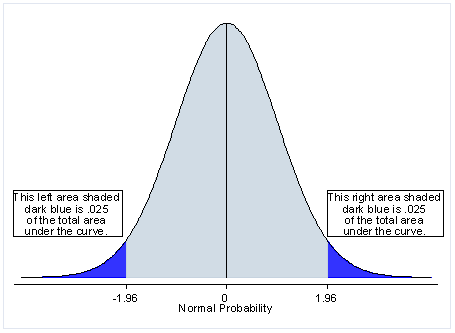

Source: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

In [ ]:
norm.ppf(0.975)

1.959963984540054

In [ ]:
1.96*sigma/np.sqrt(N)+mu_0

5.003578454042367

In [ ]:
-1.96*sigma/np.sqrt(N)+mu_0

4.996421545957633


Следовательно:

$$q_{\frac{\alpha=5\%}{2}} \approx 1.96 \implies  c^-=4.9964, c^+=5.0036$$

Где $R_{\frac{\alpha=5\%}{2}} \in (-\infty, 4.9964) \cup  (5.0036, +\infty)$ критическая область (rejection regeon)

Статистический критерий:

$$\psi_\alpha=\mathbb{1}\left[\left( \sqrt{N} \frac{|\bar{X}_{N_A} - \mu_0|}{\sigma} \right) > q_{\frac{\alpha=5\%}{2}}=1.96 \right] = \mathbb{1}\left[(\bar{X}_{N_A} \leq 4.9964) \vee (\bar{X}_{N_A} \geq 5.0036) \right]$$

In [ ]:
np.sqrt(N)*(np.abs(4.99-mu_0))/sigma

5.477225575051545

In [ ]:
1 - norm.cdf(np.sqrt(N)*(np.abs(4.99-mu_0))/sigma)

2.1602315269930727e-08

$$ \sqrt{N} \frac{|\bar{X}_{N_A} - \mu_0|}{\sigma} \approx 5.48 > 1.96 $$

$$\bar{X}_{N_A} = 4.99 \in R_N^- $$

$$p=2.16*10^{-8}$$

Следовательно, мы **отвергаем нулевую гипотезу** на уровне значимости 5%.